# Exploring the Rosetta Stone of Human Capital

This assignment is based on the working paper A Rosetta Stone of Human Capital, by Dev Patel and Justin Sandefur. 

There are different tests that measure reading and writing skills at school among countries in the world. The problem is that not all countries use the same tests. The basic contribution of the authors was to come up with a way to facilitate conversion between test scores in different countries. In this way they have created what they call a "Rosetta Stone of Human Capital", because it allows us to compare human capital across the different countries.



---

> Christos Kallaras , p2822009 <br />
>Department of Management Science and Technology <br />
>Master in Business Analytics <br />
>Athens University of Economics and Business


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats.stats as stats
from plotnine import *

Note : In order to run the paper correctly enter the path of the files in this literal (files in the Replication Files directory should stay there).

In [2]:
path = 'C:/Users/Christos Kallaras/Desktop/Master/1st Year/2nd Trimester/Analytics Practicum 1/2nd Assigment'

First i read the dataset that includes standardized performance metrics for reading and math for fourth grade students in the countries in the sample. Column 1 lists the country name, and column 2 lists the country abbreviation. Columns 3 and 4 list the portion of people above the "Low International Benchmark" of 400 on the TIMSS Math and Reading scales. Columns 5 and 6 report the median scores on the TIMSS math scale and PIRLS reading scale.

In [3]:
#read only the sheet containing country scores
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx',sheet_name='Country Scores')
country_scores.shape
country_scores.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


### Q1: Income and Test Results

In the first question i will study the relationship between income and the TIMSS and PIRLS score, as in Section 4.1 and Figure 5 of the original paper.

We need the file which contains income data per country as given by the World Bank.

In [4]:
#Read the file
country_incomes = pd.read_csv(path + '/Replication Files/DATA/WDI_data.csv')
print(country_incomes.shape)
country_incomes.head(5)

(797, 5)


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266


First we see if there are null values in the dataset

In [5]:
country_incomes.isnull()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
792,True,True,True,True,True
793,True,True,True,True,True
794,True,True,True,True,True
795,False,True,True,True,True


The problem seems to happen in the last records so we take a look at the last 10.

In [6]:
country_incomes.tail(10)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..
791,Zimbabwe,ZWE,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN
796,Last Updated: 05/21/2018,NaN,NaN,NaN,NaN


We find the rows in which every column is null.

In [7]:
null_values = country_incomes[country_incomes.isnull().any(axis=1) == True].index.tolist()
null_values

[792, 793, 794, 795, 796]

As seen above, it is correct that rows 792,793,794,795 and 796 have null values. Since the null are on columns that we need , i will exclude those rows from the dataset.

In [8]:
country_incomes = country_incomes.loc[0:791]
country_incomes

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


We can see that there are values with ".." in column 2015[YR2015]. This column has incomes so i will change the string ".." with 0.

In [9]:
country_incomes['2015 [YR2015]'].replace(regex=True, inplace=True, to_replace='\.\.',value='0')
country_incomes

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,0
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,0
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,0
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,0


Then i transform this column so it can be of type float since the information is number.

In [10]:
country_incomes['2015 [YR2015]'].astype(float)

0       1809.016488
1          0.000000
2        107.225357
3      10971.292517
4         95.199600
           ...     
787        0.000000
788        0.000000
789     1912.280264
790        0.000000
791        0.000000
Name: 2015 [YR2015], Length: 792, dtype: float64

Since we only need the GDP per capita i will only keep those records.

In [11]:
country_incomes = country_incomes[country_incomes['Series Name'] == "GDP per capita, PPP (constant 2011 international $)"]
country_incomes.head(10)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,0
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,0
15,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.06799206401
18,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.9474879241
21,Arab World,ARB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,15304.9964447023
24,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688
27,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571


Before merging this dataset with the country scores i will check if there are null values in the country score dataset.

In [12]:
null_values_score = country_scores[country_scores.isnull().all(axis=1) == True].index.tolist()
null_values_score

[]

There are no records will all values as null, so i will continue with merging the 2 datasets.

In [13]:
country = pd.merge(country_incomes,
                     country_scores,
                     on='Country Code',
                     how = 'inner'
                    )
country.head(10)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688,Argentina,51.000000,66.000000,406.652557,431.443542
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571,Armenia,71.505402,NaN,454.000000,NaN
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43719.5021648696,Australia,90.000000,92.932800,520.000000,534.000000
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,44353.8752139122,Austria,95.302193,97.104111,511.000000,533.000000
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,16698.8636532538,Azerbaijan,72.284508,81.859566,465.000000,467.000000
5,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43926.474036316,Bahrain,67.000000,NaN,439.000000,NaN
6,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1987.16714645212,Benin,35.000000,35.000000,390.949188,394.196686
7,Botswana,BWA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,15356.457617167,Botswana,NaN,NaN,410.000000,380.000000
8,Brazil,BRA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14666.0181678984,Brazil,59.000000,72.000000,410.628387,443.695404
9,Bulgaria,BGR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,17000.1672471067,Bulgaria,NaN,93.048439,NaN,541.000000


In [14]:
print(country.columns)
print('Column "Series Name" : ' + country['Series Name'].unique())
print('Column "Series Code" : ' + country['Series Code'].unique())

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2015 [YR2015]', 'Country',
       'Percent Above Math Benchmark (400 on TIMSS Scale)',
       'Percent Above Reading Benchmark (400 on PIRLS Scale)',
       'Median Math Score (TIMSS Scale, 4th Grade)',
       'Median Reading Score (PIRLS Scale, 4th Grade)'],
      dtype='object')
['Column "Series Name" : GDP per capita, PPP (constant 2011 international $)']
['Column "Series Code" : NY.GDP.PCAP.PP.KD']


The column 'Country Name' exists 2 times so i will remove one. Columns 'Series Name' and 'Series Code' have one value for all the records so i will remove them since they don't add anything to the dataset. Finally i will change the names of the remaining columns into something more understandable and usable.

In [15]:
#delete columns Country,Series Name and Series Code
country = country.drop(columns=["Series Name","Series Code","Country"])

In [16]:
#rename the remaining columns
country = country.rename(columns={"Percent Above Math Benchmark (400 on TIMSS Scale)": "TIMSS_PER", 
                          "Percent Above Reading Benchmark (400 on PIRLS Scale)": "PIRLS_PER",
                          "Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS_SCORE",
                          "Median Reading Score (PIRLS Scale, 4th Grade)" : "PIRLS_SCORE",
                          "2015 [YR2015]" : "Income"
                         })

In [17]:
country.head(5)

,Country Name,Country Code,Income,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,Argentina,ARG,19101.2973920688,51.000000,66.000000,406.652557,431.443542
1,Armenia,ARM,8195.93364956571,71.505402,NaN,454.000000,NaN
2,Australia,AUS,43719.5021648696,90.000000,92.932800,520.000000,534.000000
3,Austria,AUT,44353.8752139122,95.302193,97.104111,511.000000,533.000000
4,Azerbaijan,AZE,16698.8636532538,72.284508,81.859566,465.000000,467.000000


I will now check again for null values(as we can see clearly there are some in columns TIMSS_SCORE and PIRLS_SCORE).

In [18]:
country[country.isnull().any(axis=1) == True].index.tolist()

[1, 5, 7, 9, 13, 26, 33, 36, 38, 39, 40, 41, 62, 66, 69, 71, 72, 73, 77]

In [19]:
country.isna().any()

Country Name    False
Country Code    False
Income          False
TIMSS_PER        True
PIRLS_PER        True
TIMSS_SCORE      True
PIRLS_SCORE      True
dtype: bool

In [20]:
country = country[country['TIMSS_PER'].notna()]
country = country[country['PIRLS_PER'].notna()]
country = country[country['TIMSS_SCORE'].notna()]
country = country[country['PIRLS_SCORE'].notna()]
country.head(5)

,Country Name,Country Code,Income,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,Argentina,ARG,19101.2973920688,51.000000,66.000000,406.652557,431.443542
2,Australia,AUS,43719.5021648696,90.000000,92.932800,520.000000,534.000000
3,Austria,AUT,44353.8752139122,95.302193,97.104111,511.000000,533.000000
4,Azerbaijan,AZE,16698.8636532538,72.284508,81.859566,465.000000,467.000000
6,Benin,BEN,1987.16714645212,35.000000,35.000000,390.949188,394.196686


Now lets see the relationship between Income and TIMSS and PIRLS.

Text(0, 0.5, 'TIMSS')

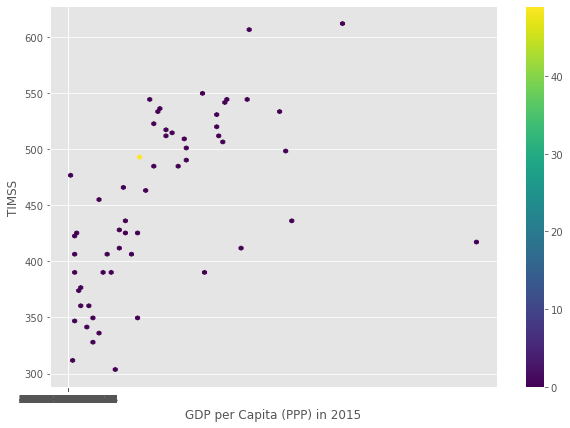

In [21]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,7))
hb = plt.hexbin(country['Income'],y=country['TIMSS_SCORE'], bins=50, mincnt=1)
fig.colorbar(hb)
plt.xlabel('GDP per Capita (PPP) in 2015')
plt.ylabel('TIMSS')

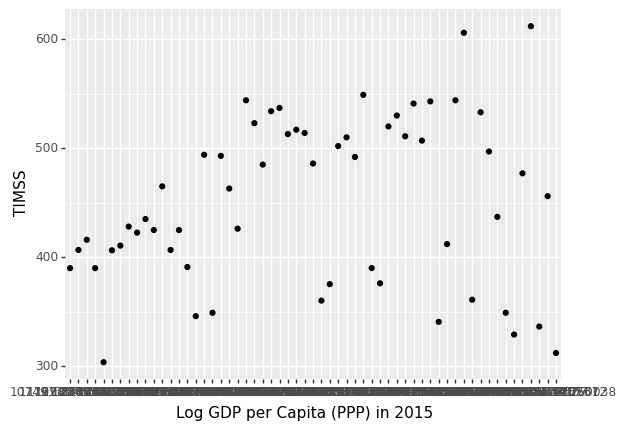

<ggplot: (136878695638)>

In [22]:
ggplot() + geom_point(mapping = aes(x=country['Income'], y=country['TIMSS_SCORE'])) + labs(y="TIMSS", x = "Log GDP per Capita (PPP) in 2015")

Text(0, 0.5, 'PIRLS')

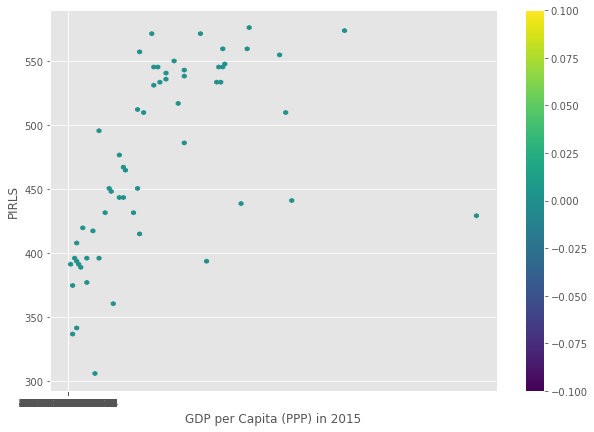

In [23]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,7))
hb = plt.hexbin(country['Income'],y=country['PIRLS_SCORE'], bins=50, mincnt=1)
fig.colorbar(hb)
plt.xlabel('GDP per Capita (PPP) in 2015')
plt.ylabel('PIRLS')

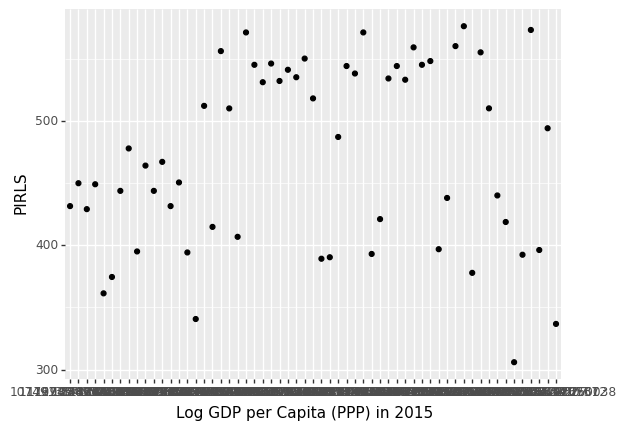

<ggplot: (136876377293)>

In [24]:
ggplot() + geom_point(mapping = aes(x=country['Income'], y=country['PIRLS_SCORE'])) + labs(y="PIRLS", x = "Log GDP per Capita (PPP) in 2015")

We can see that the distribution is skewed and so i will apply log transformation to Income.

In [25]:
country['Income']= country['Income'].astype(float)
country['Income']= np.log(country['Income'])

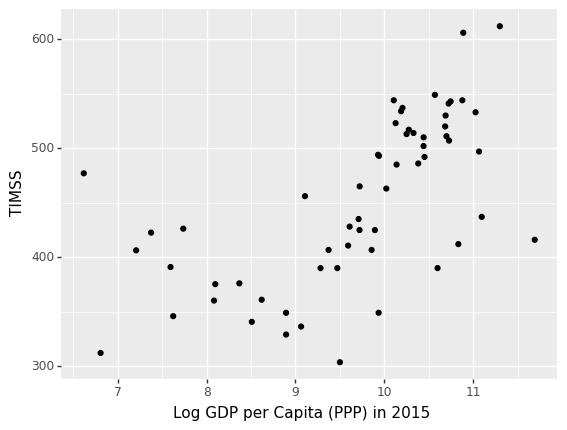

<ggplot: (136878834854)>

In [26]:
ggplot() + geom_point(mapping = aes(x=country['Income'], y=country['TIMSS_SCORE']))+ labs(y="TIMSS", x = "Log GDP per Capita (PPP) in 2015")

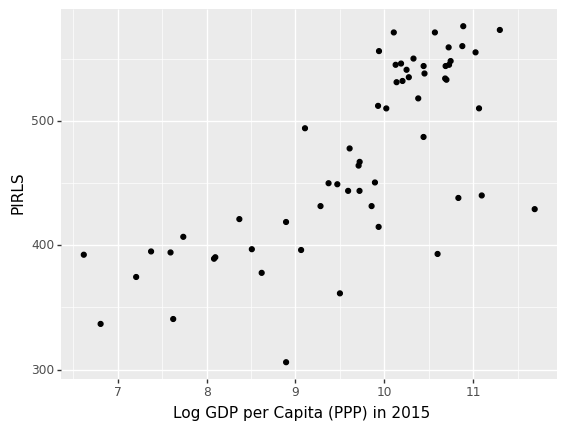

<ggplot: (136878859439)>

In [27]:
ggplot() + geom_point(mapping = aes(x=country['Income'], y=country['PIRLS_SCORE']))+ labs(y="PIRLS", x = "Log GDP per Capita (PPP) in 2015")

I will now examine the correlation between Income and the 2 scores.

A way to measure correlation is the Pearson correlation coefficient, that takes values between -1 to 1. A value of +1  shows a total positive linear correlation, a value of  −1  shows a total negative linear correlation, and a value of  0  shows no linear correlation.

In [28]:
print('Pearson correlation for TIMSS score : ' , stats.pearsonr(country['Income'], country['TIMSS_SCORE']))
print('Pearson correlation for PIRLS score : ' , stats.pearsonr(country['Income'], country['PIRLS_SCORE']))

Pearson correlation for TIMSS score :  (0.6277038682434909, 1.0324751749059753e-07)
Pearson correlation for PIRLS score :  (0.7309053457216952, 4.9558335313412934e-11)


In [29]:
print('Spearman for TIMSS score : ' , stats.spearmanr(country['Income'], country['TIMSS_SCORE']))
print('Spearman for PIRLS score : ' , stats.spearmanr(country['Income'], country['PIRLS_SCORE']))

Spearman for TIMSS score :  SpearmanrResult(correlation=0.7098706821021625, pvalue=3.0708359726675077e-10)
Spearman for PIRLS score :  SpearmanrResult(correlation=0.7320815391790518, pvalue=4.452955945360709e-11)


The correlation coefficient from the above tests indicates strong positive linear correlation in all cases.

Finally i create 2 linear regression models, the first with TIMSS_SCORE and the second with PIRLS_SCORE on the log transformed data. The summary of those 2 can be seen bellow.

In [30]:
timss_mod = smf.ols('TIMSS_SCORE~Income', data=country)
timss_res = timss_mod.fit()
timss_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMSS_SCORE   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     37.06
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.03e-07
Time:                        21:03:10   Log-Likelihood:                -324.04
No. Observations:                  59   AIC:                             652.1
Df Residuals:                      57   BIC:                             656.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.5369     64.243      0.989      0.327     -65.107     192.181
Income        40.0603      6.580      6.088      0.000      26.883      53.237
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.557
Skew:                          -0.212   Prob(JB):                        0.757
Kurtosis:                       2.785   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pirls_mod = smf.ols('PIRLS_SCORE~Income', data=country)
pirls_res = pirls_mod.fit()
pirls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_SCORE   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     65.38
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.96e-11
Time:                        21:03:10   Log-Likelihood:                -313.90
No. Observations:                  59   AIC:                             631.8
Df Residuals:                      57   BIC:                             635.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.7021     54.092      0.697      0.489     -70.614     146.019
Income        44.7991      5.541      8.086      0.000      33.704      55.894
==============================================================================
Omnibus:                       10.063   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.956
Skew:                          -0.976   Prob(JB):                      0.00689
Kurtosis:                       3.492   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see R2 is 0.534, a value that indicates goodness-of-fit.

### Q2: Years of Schooling and Test Scores

In this question i will explore how much years of schooling impact test scores, taking account of the per capita income.


First i will read the file which contains average years of schooling data from Barro, Robert J. and Jong-Wha Lee, A New Data Set of Educational Attainment in the World, 1950-2010, Journal of Development Economics, 2013, 104, 194-198. 

In [32]:
avg_years = pd.read_stata(path + '/Replication Files/DATA/BL2013_MF1599_v2.2.dta')
avg_years.head(5)

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


We are only interested for year 2010 so i will limit the dataset for that year.

In [33]:
avg_years = avg_years[avg_years['year'] == 2010.0]
avg_years.head(5)

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa


In [34]:
avg_years[avg_years.isnull().any(axis=1) == True].index.tolist()

[]

We can see from the above that there are no null values in the dataset. Since i am going to merge this with the previous dataset from Question 1, i need to change the column's "WBcode" name to "Country Code" in order to use it as key.

In [35]:
#rename the column WBcode in order to join with the country dataset
avg_years = avg_years.rename(columns={"WBcode": "Country Code"})
cnt_scr_avg_year = pd.merge(country,
                     avg_years,
                     on='Country Code',
                     how = 'inner'
                    )
cnt_scr_avg_year.head(5)

,Country Name,Country Code,Income,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE,BLcode,country,year,...,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code
0,Argentina,ARG,9.857512,51.000000,66.000000,406.652557,431.443542,67.0,Argentina,2010.0,...,48.648952,31.072559,11.178634,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,Latin America and the Caribbean
1,Australia,AUS,10.685550,90.000000,92.932800,520.000000,534.000000,131.0,Australia,2010.0,...,60.713318,38.486927,30.979252,18.516401,11.541207,5.966004,4.585290,0.989913,17323.0,Advanced Economies
2,Austria,AUT,10.699955,95.302193,97.104111,511.000000,533.000000,107.0,Austria,2010.0,...,59.963654,40.812618,15.362918,9.365829,9.603404,3.848745,5.260084,0.494575,7090.0,Advanced Economies
3,Benin,BEN,7.594465,35.000000,35.000000,390.949188,394.196686,3.0,Benin,2010.0,...,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,Sub-Saharan Africa
4,Brazil,BRA,9.593288,59.000000,72.000000,410.628387,443.695404,69.0,Brazil,2010.0,...,45.474285,26.366810,9.351038,5.633033,7.886318,5.314825,2.271812,0.299681,145288.0,Latin America and the Caribbean


Note that a logarithmic transformation has been applied on income from question 1. I still need it so i will keep it that way.

I will now proceed to create the necessary models. We need at first 3 models. The first is a model for the the logged per capita GDP in 2015 (Income) and the years of schooling (yr_sch).

In [36]:
years_mod = smf.ols("yr_sch~Income", data=cnt_scr_avg_year)
years_res = years_mod.fit()
years_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.89e-16
Time:                        21:03:10   Log-Likelihood:                -96.851
No. Observations:                  54   AIC:                             197.7
Df Residuals:                      52   BIC:                             201.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8857      1.725     -6.312      0.000     -14.346      -7.425
Income         2.0338      0.175     11.596      0.000       1.682       2.386
==============================================================================
Omnibus:                        4.046   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.024
Skew:                          -0.526   Prob(JB):                        0.220
Kurtosis:                       3.487   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second and third models are the same as in question one : for TIMSS and PIRLS. Since the dataset has changed i need to fit the models again with the new dataset.

In [37]:
timss_mod = smf.ols('TIMSS_SCORE~Income', data=cnt_scr_avg_year)
timss_res = timss_mod.fit()
timss_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMSS_SCORE   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     36.36
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.72e-07
Time:                        21:03:10   Log-Likelihood:                -296.81
No. Observations:                  54   AIC:                             597.6
Df Residuals:                      52   BIC:                             601.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1227     69.955      0.516      0.608    -104.251     176.497
Income        42.9021      7.114      6.030      0.000      28.626      57.178
==============================================================================
Omnibus:                        0.463   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.233
Skew:                          -0.161   Prob(JB):                        0.890
Kurtosis:                       3.009   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pirls_mod = smf.ols('PIRLS_SCORE~Income', data=cnt_scr_avg_year)
pirls_res = pirls_mod.fit()
pirls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_SCORE   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     63.82
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.33e-10
Time:                        21:03:10   Log-Likelihood:                -285.83
No. Observations:                  54   AIC:                             575.7
Df Residuals:                      52   BIC:                             579.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9007     57.088      0.419      0.677     -90.655     138.456
Income        46.3817      5.806      7.989      0.000      34.731      58.032
==============================================================================
Omnibus:                       10.805   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.635
Skew:                          -1.023   Prob(JB):                      0.00490
Kurtosis:                       3.737   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see R2 is 0.551, a value that indicates goodness-of-fit.

Next i will get the residuals for TIMSS, PIRLS and scooling and add them to the dataframe.

In [39]:
cnt_scr_avg_year['TIMSS_RESIDUALIZED'] = timss_res.resid
cnt_scr_avg_year['PIRLS_RESIDUALIZED'] = pirls_res.resid
cnt_scr_avg_year['Years_Residualized'] = years_res.resid
cnt_scr_avg_year.head(5)

,Country Name,Country Code,Income,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE,BLcode,country,year,...,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code,TIMSS_RESIDUALIZED,PIRLS_RESIDUALIZED,Years_Residualized
0,Argentina,ARG,9.857512,51.000000,66.000000,406.652557,431.443542,67.0,Argentina,2010.0,...,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,Latin America and the Caribbean,-52.378517,-49.665187,0.347803
1,Australia,AUS,10.685550,90.000000,92.932800,520.000000,534.000000,131.0,Australia,2010.0,...,18.516401,11.541207,5.966004,4.585290,0.989913,17323.0,Advanced Economies,25.444323,14.485473,0.694567
2,Austria,AUT,10.699955,95.302193,97.104111,511.000000,533.000000,107.0,Austria,2010.0,...,9.365829,9.603404,3.848745,5.260084,0.494575,7090.0,Advanced Economies,15.826283,12.817308,-1.272535
3,Benin,BEN,7.594465,35.000000,35.000000,390.949188,394.196686,3.0,Benin,2010.0,...,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,Sub-Saharan Africa,29.007636,18.051848,-0.129824
4,Brazil,BRA,9.593288,59.000000,72.000000,410.628387,443.695404,69.0,Brazil,2010.0,...,5.633033,7.886318,5.314825,2.271812,0.299681,145288.0,Latin America and the Caribbean,-37.066950,-25.158212,-0.738880


Since we now have the residuals i can fit a new regression model between the TIMMS residuals and the schooling residuals, and another between the PIRLS residuals and the schooling residuals.

In [40]:
timss_sch_mod = smf.ols('TIMSS_RESIDUALIZED~Years_Residualized', data=cnt_scr_avg_year)
timss_sch_res = timss_sch_mod.fit()
timss_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     TIMSS_RESIDUALIZED   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     15.62
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           0.000234
Time:                        21:03:10   Log-Likelihood:                -289.71
No. Observations:                  54   AIC:                             583.4
Df Residuals:                      52   BIC:                             587.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.072e-14      7.174   9.86e-15      1.000     -14.397      14.397
Years_Residualized    19.4984      4.933      3.953      0.000       9.600      29.397
==============================================================================
Omnibus:                        4.227   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.327
Skew:                           0.412   Prob(JB):                        0.190
Kurtosis:                       3.895   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pirls_sch_mod = smf.ols('PIRLS_RESIDUALIZED~Years_Residualized', data=cnt_scr_avg_year)
pirls_sch_res = pirls_sch_mod.fit()
pirls_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     PIRLS_RESIDUALIZED   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     34.45
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.09e-07
Time:                        21:03:10   Log-Likelihood:                -272.11
No. Observations:                  54   AIC:                             548.2
Df Residuals:                      52   BIC:                             552.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.759e-13      5.178   -3.4e-14      1.000     -10.391      10.391
Years_Residualized    20.8977      3.560      5.870      0.000      13.753      28.042
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.113
Skew:                           0.026   Prob(JB):                        0.945
Kurtosis:                       3.218   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

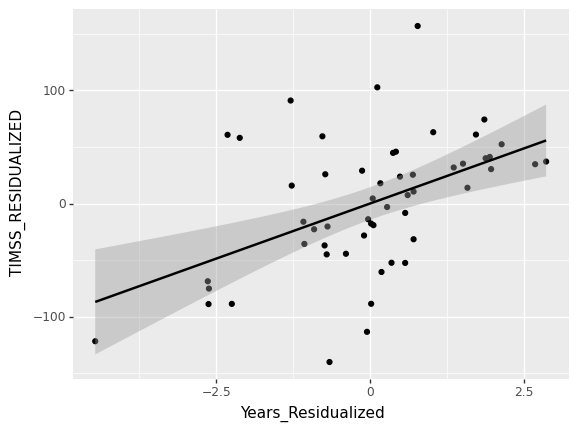

<ggplot: (136879231991)>

In [42]:
#maybe delete
ggplot() + geom_point(aes(x= cnt_scr_avg_year['Years_Residualized'], y= cnt_scr_avg_year['TIMSS_RESIDUALIZED']))+\
geom_smooth(mapping=aes(x= cnt_scr_avg_year['Years_Residualized'], y= cnt_scr_avg_year['TIMSS_RESIDUALIZED']), method="lm")

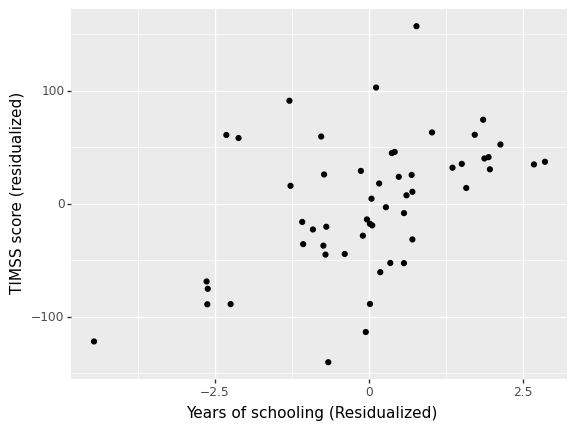

<ggplot: (136879258968)>

In [43]:
ggplot() + geom_point(aes(x=cnt_scr_avg_year['Years_Residualized'], y=cnt_scr_avg_year['TIMSS_RESIDUALIZED'])) + labs(y="TIMSS score (residualized)", x = "Years of schooling (Residualized)")

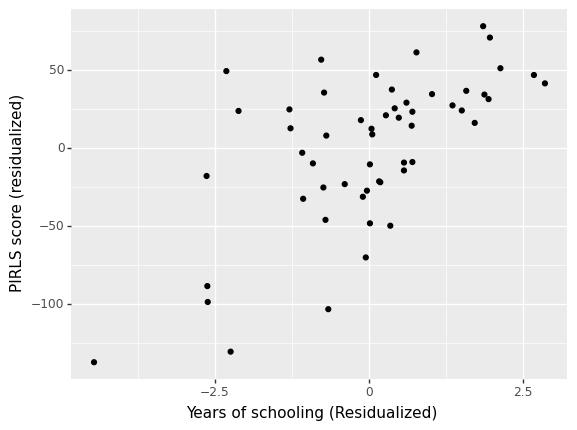

<ggplot: (136879051370)>

In [44]:
ggplot() + geom_point(aes(x=cnt_scr_avg_year['Years_Residualized'], y=cnt_scr_avg_year['PIRLS_RESIDUALIZED'])) + labs(y="PIRLS score (residualized)", x = "Years of schooling (Residualized)")

### Q3: Compare New and Previous Estimates
In this question i will see if the results of the authors make sense, by comparing their scales with other estimates of learning outcomes.


For the purposes of this analysis we will need the dataset that contains learning outcome estimates from the World Bank, as reported in Altinok, Nadir, Noam Angrist, and Harry Anthony Patrinos, Global Data Set on Education Quality (1965-2015), World Bank Policy Research Working Paper, 2018.

In [45]:
hlo = pd.read_stata(path + '/Replication Files/DATA/HLO Panel Data (mean, thresh) - Jan 2018.dta')
hlo.head(5)

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN


The percentage of subjects above the 400 mark is given by the low_threshold column. As we can see there are plenty of null values in that column, so i will only keep the records that column low_threshold has value.

In [46]:
hlo = hlo[hlo['low_threshold'].notna()]
hlo.head(5)

,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000


I will now merge this dataset with the one with the country scores. The data from the HLO dataset cover multiple years for each country but we need the latest year for which estimates are available for each country. Columns "idcntry" and "country" do not add anaything else so i delete them. I also change the names in the country scores dataset to something more usable.

In [47]:
#use latest year for each country
hlo = hlo.groupby('cntabb').apply(lambda x: x.sort_values('year', ascending = False).head(1))
#delete idcntry and country
hlo = hlo.drop(columns=["idcntry","country"])
hlo.head(5)

,,cntabb,year,HLO,low_threshold
cntabb,,,,,
ADA,10,ADA,2015,437.070007,73.750000
ADU,526,ADU,2015,510.089996,91.440002
ALB,21,ALB,2015,436.730011,70.650002
ARB,54,ARB,2015,414.190002,67.750000
ARE,1760,ARE,2015,460.489990,80.839996


In [48]:
#rename the remaining columns
country_scores = country_scores.rename(columns={"Percent Above Math Benchmark (400 on TIMSS Scale)": "TIMSS_PER", 
                          "Percent Above Reading Benchmark (400 on PIRLS Scale)": "PIRLS_PER",
                          "Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS_SCORE",
                          "Median Reading Score (PIRLS Scale, 4th Grade)" : "PIRLS_SCORE",
                         })


In [49]:
hlo_with_scores = pd.merge(
                        hlo[["year", "HLO", "low_threshold"]],
                        country_scores,
                        left_on = "cntabb",
                        right_on = "Country Code",
                        how="inner"
                     )
hlo_with_scores.head(5)

,year,HLO,low_threshold,Country,Country Code,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,2015,460.489990,80.839996,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,2015,429.380005,70.860001,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,2010,469.070007,86.129997,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,2015,509.220001,91.529999,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,2015,519.539978,88.510002,Austria,AUT,95.302193,97.104111,511.000000,533.000000


For this analysis we need to exclude the null values for column TIMSS_PER and PIRLS_PER. Those columns show the Percent Above Math Benchmark (400 on TIMSS Scale) and the Percent Above Reading Benchmark (400 on PIRLS Scale) respectively. But if we delete all the records with null in TIMSS_PER or PIRLS_PER we will have also deleted the records that have TIMSS_PER but a value in PIRLS_PER. So i will divide the dataset in 2 datasets. The first will contain data with no null values in TIMSS_RATE and the second , data with no null values in PIRLS_PER.

In [50]:
hlo_with_scores_timss = hlo_with_scores[hlo_with_scores['TIMSS_PER'].notna()]
hlo_with_scores_pirls = hlo_with_scores[hlo_with_scores['PIRLS_PER'].notna()]

To compare the new and the previous estimates, i will run a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS.

In [51]:
print(stats.spearmanr(hlo_with_scores_timss['TIMSS_PER'], hlo_with_scores_timss['low_threshold']))

SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)


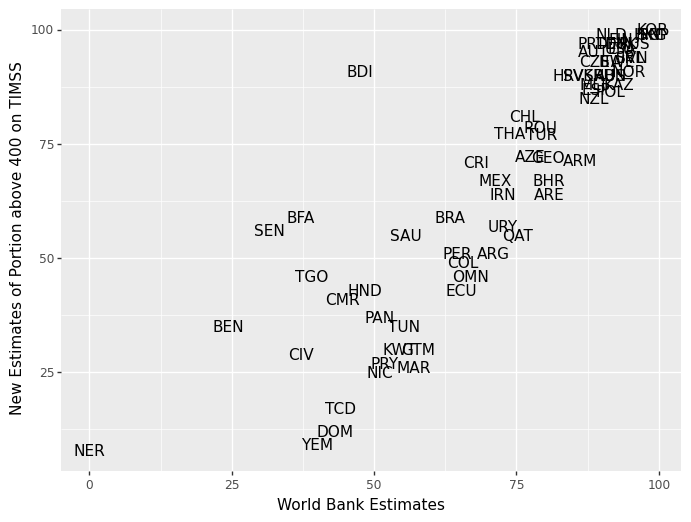

<ggplot: (136879057993)>

In [52]:
ggplot(data=hlo_with_scores_timss, mapping=aes(x='low_threshold', y='TIMSS_PER')) +\
    geom_point(alpha=0, na_rm=True) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on TIMSS') +\
    geom_text(mapping=aes(label='Country Code'), data=hlo_with_scores_timss) +\
    theme(figure_size=(8, 6))

Based on the Spearmanr results and the plots , we can see that there a strong positive linear relationship between the threshold and the TIMSS percentage above 400. Countries with higher threshold tend to have a greater percentage in TIMSS.

Now i will perform the same analysis for PIRLS.

In [53]:
print(stats.spearmanr(hlo_with_scores_pirls['PIRLS_PER'], hlo_with_scores_pirls['low_threshold']))

SpearmanrResult(correlation=0.904517341824943, pvalue=5.290584772193869e-25)


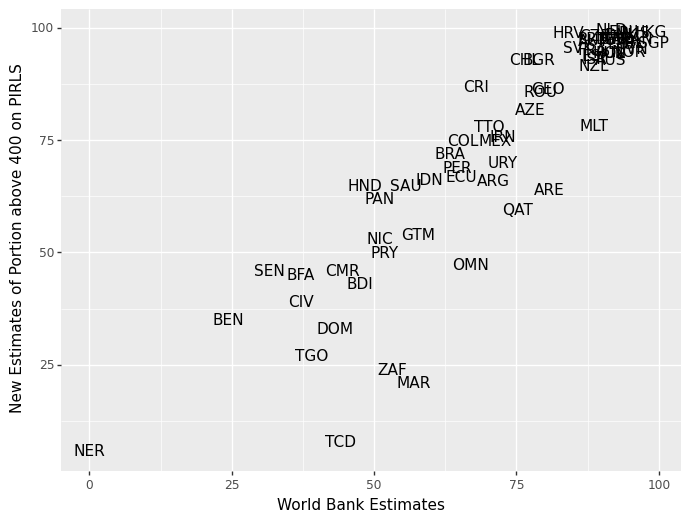

<ggplot: (136879356293)>

In [54]:
ggplot(data=hlo_with_scores_pirls, mapping=aes(x='low_threshold', y='PIRLS_PER')) +\
    geom_point(alpha=0, na_rm=True) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on PIRLS') +\
    geom_text(mapping=aes(label='Country Code'), data=hlo_with_scores_pirls) +\
    theme(figure_size=(8, 6))

The results for PIRLS are basically the same as is with TIMSS. Based on the Spearmanr results and the plots , we can see that there a strong positive linear relationship between the threshold and the PIRLS percentage above 400. Countries with higher threshold tend to have a greater percentage in PIRLS.

### Q4: Skills Intensity

In this question i will study the relationship between the skills of the people in each country and the value of its exports.

We need the dataset to identify college graduates, with at least 10 years of education. Similarly, i will identify high school graduates, with at least 6 years of education. For every different industry in the census data, i will calculate the weighted average, for that industry, of college graduates and high school graduate.

In [55]:
usa_edu = pd.read_csv(path + '/usa_00001.csv.gz')
usa_edu.head(5)

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877


In [56]:
usa_edu[usa_edu.isnull().any(axis=1) == True].index.tolist()

[]

We can see that there are no null values in the dataste, so i will proceed by identifying college graduates, with at least 10 years of education.

In [57]:
usa_edu_col_st = usa_edu.loc[usa_edu['EDUC'] >= 10]
usa_edu_col_st.head(5)

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
8,2000,200004,5,600.0,2000000000054,12,1,1,603.0,10,101,3,30,700,959
13,2000,200004,7,600.0,2000000000074,6,1,1,628.0,10,101,1,10,3300,819
14,2000,200004,7,600.0,2000000000074,6,1,2,708.0,11,114,1,10,2600,657
20,2000,200004,11,600.0,2000000000114,17,1,2,518.0,11,116,1,10,2010,837
21,2000,200004,12,200.0,2000000000124,11,1,1,214.0,10,101,3,30,30,668


Next i will identify high school graduates, with at least 6 years of education.

In [58]:
usa_edu_high_st = usa_edu.loc[usa_edu['EDUC'] >= 6]
usa_edu_high_st.head(5)

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877


I need to calculate the Weighted average , a calculation that takes into account the varying degrees of importance of the numbers in the data set.

In [59]:
usa_edu_high_st = usa_edu_high_st.groupby(by=['IND','PERWT','EDUC']).size().to_frame(name = 'count').reset_index()
usa_edu_high_st['Weight'] = usa_edu_high_st['count'] * usa_edu_high_st['PERWT']
usa_edu_high_st = usa_edu_high_st.groupby(by=['IND']).sum('PERWT')
usa_edu_high_st['Weight_Avg'] = usa_edu_high_st['Weight'] / usa_edu_high_st['PERWT']
usa_edu_high_st.head(5)

,PERWT,EDUC,count,Weight,Weight_Avg
IND,,,,,
0,5020632.0,36385,41409,28314555.0,5.639640
17,571833.0,6820,1374,806904.0,1.411083
18,415276.0,4464,832,516534.0,1.243833
19,29491.0,407,51,29645.0,1.005222
27,108209.0,915,150,112982.0,1.044109


In [60]:
usa_edu_col_st = usa_edu_col_st.groupby(by=['IND','PERWT','EDUC']).size().to_frame(name = 'count').reset_index()
usa_edu_col_st['Weight'] = usa_edu_col_st['count'] * usa_edu_col_st['PERWT']
usa_edu_col_st = usa_edu_col_st.groupby(by=['IND']).sum('PERWT')
usa_edu_col_st['Weight_Avg'] = usa_edu_col_st['Weight'] / usa_edu_col_st['PERWT']
usa_edu_col_st.head(5)

,PERWT,EDUC,count,Weight,Weight_Avg
IND,,,,,
0,1281863.0,14966,7766,5117532.0,3.992261
17,117050.0,2174,244,133389.0,1.139590
18,67264.0,1184,124,70935.0,1.054576
19,9941.0,207,21,10095.0,1.015491
27,7917.0,103,10,7917.0,1.000000


I will now create a new dataframe called skills_intensity_industry since it shows every industry the intensity of skills of the people working in that particular industry in the 2000 census. It contains the industry, the weighted average for college graduates, and the weighted average for high school graduates.

In [61]:
skills_intensity_industry = usa_edu_high_st[['Weight_Avg']], usa_edu_col_st[['Weight_Avg']].copy() 
skills_intensity_industry = pd.DataFrame([usa_edu_high_st.Weight_Avg,usa_edu_col_st.Weight_Avg ]).transpose()
skills_intensity_industry.columns=['Weight_Avg_HS','Weight_Avg_CL']
skills_intensity_industry.head(5)

,Weight_Avg_HS,Weight_Avg_CL
IND,,
0,5.639640,3.992261
17,1.411083,1.139590
18,1.243833,1.054576
19,1.005222,1.015491
27,1.044109,1.000000


I will proceed with reading the file that maps the industry codes of 2000 to those of 1990, with a weight to account for the differences in the ten years since the industry codes for 1990 are not the same with the industry codes used in 2000. I will then use that file to reweight the weighted averages in skills_intensity_industry with the corresponding weight in each mapping.

In [62]:
cw = pd.read_stata(path + '/Replication Files/DATA/cw_ind2000_ind1990ddx.dta')
cw.head(5)

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907


In [63]:
cw_skills_in = pd.merge(skills_intensity_industry,
                     cw,
                     left_on = 'IND',
                     right_on = 'ind2000',
                     how = 'inner')
cw_skills_in.head(5)

,Weight_Avg_HS,Weight_Avg_CL,ind2000,ind1990ddx,weight
0,1.411083,1.139590,17,10,0.994016
1,1.411083,1.139590,17,31,0.002637
2,1.411083,1.139590,17,121,0.001740
3,1.411083,1.139590,17,561,0.001607
4,1.243833,1.054576,18,11,0.990907


We need to calculate the new weight.

In [64]:
skills_intensity_industry = cw_skills_in.groupby('ind2000').apply(lambda x: x.sort_values('ind2000', ascending = False))
skills_intensity_industry.head(5)

Weight_Avg_HS  Weight_Avg_CL  ind2000  ind1990ddx    weight
ind2000                                                               
17      0       1.411083       1.139590       17          10  0.994016
        1       1.411083       1.139590       17          31  0.002637
        2       1.411083       1.139590       17         121  0.001740
        3       1.411083       1.139590       17         561  0.001607
18      4       1.243833       1.054576       18          11  0.990907

In [65]:
skills_intensity_industry['Reweight_High_School'] = skills_intensity_industry['Weight_Avg_HS'] * skills_intensity_industry['weight']
skills_intensity_industry['Reweight_Value_College'] = skills_intensity_industry['Weight_Avg_CL'] * skills_intensity_industry['weight']
skills_intensity_industry.reset_index(inplace=True, drop=True)
skills_intensity_industry.head(5)

,Weight_Avg_HS,Weight_Avg_CL,ind2000,ind1990ddx,weight,Reweight_High_School,Reweight_Value_College
0,1.411083,1.139590,17,10,0.994016,1.402639,1.132770
1,1.411083,1.139590,17,31,0.002637,0.003721,0.003005
2,1.411083,1.139590,17,121,0.001740,0.002456,0.001983
3,1.411083,1.139590,17,561,0.001607,0.002268,0.001831
4,1.243833,1.054576,18,11,0.990907,1.232522,1.044986


Next i will read the file that contains records showing the exports of different countries in 2018 for different industry sectors. Then i will map the HS 6-digit code to the industry codes we are using in the rest of the data.

In [67]:
baci = pd.read_csv(path + '/BACI_HS17_Y2018_V202001.csv')
baci.columns = ['year','exporter','importer','category','trade','quantity']
baci.head(5)

,year,exporter,importer,category,trade,quantity
0,2018,4,24,845420,101.397000,26.000
1,2018,4,24,848180,2.328000,0.007
2,2018,4,31,570110,1.596000,0.037
3,2018,4,32,340319,8.699331,0.113
4,2018,4,32,610910,1.098000,0.013


In [68]:
cw_hs6 = pd.read_stata(path + '/Replication Files/DATA/cw_hs6_sic87dd.dta')
cw_hs6.head(5)

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.0,no weights needed
1,10111.0,272.0,1.0,no weights needed
2,10119.0,272.0,1.0,no weights needed
3,10120.0,272.0,1.0,no weights needed
4,10190.0,272.0,1.0,no weights needed


In [69]:
baci_cw_hs6 = pd.merge(baci,
                   cw_hs6,
                   left_on='category',
                   right_on='hs6',
                   how='inner')
baci_cw_hs6.head(5)

,year,exporter,importer,category,trade,quantity,hs6,sic87dd,share,weights_method
0,2018,4,24,845420,101.397000,26.000,845420.0,3321.0,0.636426,trade-based
1,2018,4,24,845420,101.397000,26.000,845420.0,3559.0,0.363574,trade-based
2,2018,36,288,845420,16.384946,0.177,845420.0,3321.0,0.636426,trade-based
3,2018,36,288,845420,16.384946,0.177,845420.0,3559.0,0.363574,trade-based
4,2018,36,360,845420,7.109000,0.017,845420.0,3321.0,0.636426,trade-based


I need to adjust the value of the trade flow of the BACI file with the share column of cw_hs6_sic87dd.dta.

In [70]:
baci_cw_hs6['trade'] = baci_cw_hs6['trade'] * baci_cw_hs6['share']
baci_cw_hs6.head(5)

,year,exporter,importer,category,trade,quantity,hs6,sic87dd,share,weights_method
0,2018,4,24,845420,64.531708,26.000,845420.0,3321.0,0.636426,trade-based
1,2018,4,24,845420,36.865292,26.000,845420.0,3559.0,0.363574,trade-based
2,2018,36,288,845420,10.427809,0.177,845420.0,3321.0,0.636426,trade-based
3,2018,36,288,845420,5.957137,0.177,845420.0,3559.0,0.363574,trade-based
4,2018,36,360,845420,4.524354,0.017,845420.0,3321.0,0.636426,trade-based


Next i will group the trade flow by exporter and SIC87 industry code, so that i have the total value per exporter and industry. I will then use the cw_sic87_ind1990ddx.dta file to map the SIC87 industry codes to the 1990 census industry codes.

In [71]:
baci_cw_hs6 = baci_cw_hs6.groupby(['exporter','sic87dd']).first().reset_index()
baci_cw_hs6.head(5)

,exporter,sic87dd,year,importer,category,trade,quantity,hs6,share,weights_method
0,4,119.0,2018,36,71320,5.173000,4.124,71320.0,1.000000,no weights needed
1,4,131.0,2018,398,520100,76.873211,40.193,520100.0,1.000000,no weights needed
2,4,132.0,2018,586,240130,43.993665,23.818,240130.0,1.000000,no weights needed
3,4,134.0,2018,398,70190,132.731422,616.300,70190.0,1.000000,no weights needed
4,4,139.0,2018,36,121190,11.489081,2.128,121190.0,0.994379,trade-based


In [72]:
cw_sic87 = pd.read_stata(path + '/Replication Files/DATA/cw_sic87_ind1990ddx.dta')
cw_sic87.head(5)

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119


In [73]:
baci_cw_sic87 = pd.merge(baci_cw_hs6,
                       cw_sic87,
                       left_on = 'sic87dd',
                       right_on = 'sic87',
                       how = 'inner'
                    )
baci_cw_sic87.head(5)

,exporter,sic87dd,year,importer,category,trade,quantity,hs6,share,weights_method,ind1990ddx,sic87
0,4,119.0,2018,36,71320,5.173000,4.124,71320.0,1.000000,no weights needed,10,119
1,8,119.0,2018,352,71331,1.256804,0.407,71331.0,1.000000,no weights needed,10,119
2,12,119.0,2018,826,71320,3.167000,7.400,71320.0,1.000000,no weights needed,10,119
3,16,119.0,2018,40,71333,2.329000,2.257,71333.0,1.000000,no weights needed,10,119
4,20,119.0,2018,711,100590,0.143736,35.413,100590.0,0.021786,trade-based,10,119


In [74]:
country_codes = pd.read_csv(path + '/country_codes_V202001.csv',encoding='latin-1')
country_codes.head(5)

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [75]:
exports = pd.merge(baci_cw_sic87,
                      country_codes[['country_code','iso_3digit_alpha']],
                      left_on = 'exporter',
                      right_on = 'country_code',
                      how = 'inner'
                     )
exports.head(5)

,exporter,sic87dd,year,importer,category,trade,quantity,hs6,share,weights_method,ind1990ddx,sic87,country_code,iso_3digit_alpha
0,4,119.0,2018,36,71320,5.173000,4.124,71320.0,1.000000,no weights needed,10,119,4,AFG
1,4,131.0,2018,398,520100,76.873211,40.193,520100.0,1.000000,no weights needed,10,131,4,AFG
2,4,132.0,2018,586,240130,43.993665,23.818,240130.0,1.000000,no weights needed,10,132,4,AFG
3,4,134.0,2018,398,70190,132.731422,616.300,70190.0,1.000000,no weights needed,10,134,4,AFG
4,4,139.0,2018,36,121190,11.489081,2.128,121190.0,0.994379,trade-based,10,139,4,AFG


In [76]:
exports = pd.merge(exports,
                         skills_intensity_industry,
                         left_on = 'ind1990ddx',
                         right_on = 'ind1990ddx',
                         how = 'inner'
                        )
exports = pd.merge(exports,
                          country_scores,
                          left_on = 'iso_3digit_alpha',
                          right_on = 'Country Code',
                          how = 'inner')
exports.head(5)

,exporter,sic87dd,year,importer,category,trade,quantity,hs6,share,weights_method,...,ind2000,weight,Reweight_High_School,Reweight_Value_College,Country,Country Code,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,31,119.0,2018,40,71320,5.669,4.992,71320.0,1.0,no weights needed,...,17,0.994016,1.402639,1.132770,Azerbaijan,AZE,72.284508,81.859566,465.0,467.0
1,31,119.0,2018,40,71320,5.669,4.992,71320.0,1.0,no weights needed,...,29,0.349020,0.374586,0.377183,Azerbaijan,AZE,72.284508,81.859566,465.0,467.0
2,31,131.0,2018,50,520100,475.061,280.765,520100.0,1.0,no weights needed,...,17,0.994016,1.402639,1.132770,Azerbaijan,AZE,72.284508,81.859566,465.0,467.0
3,31,131.0,2018,50,520100,475.061,280.765,520100.0,1.0,no weights needed,...,29,0.349020,0.374586,0.377183,Azerbaijan,AZE,72.284508,81.859566,465.0,467.0
4,31,132.0,2018,112,240110,2615.200,740.000,240110.0,1.0,no weights needed,...,17,0.994016,1.402639,1.132770,Azerbaijan,AZE,72.284508,81.859566,465.0,467.0


This final dataset called exports contains for each country, value of exports per industry and the weighted average of high school graduates and college graduates. This will allow me to study the relationship between the value of exports in the country and the skills possessed by the workforce in the country.

In [77]:
exports = exports.groupby(['Country Code','year','ind2000']).first().reset_index()
exports.head(5)

,Country Code,year,ind2000,exporter,sic87dd,importer,category,trade,quantity,hs6,...,Weight_Avg_HS,Weight_Avg_CL,weight,Reweight_High_School,Reweight_Value_College,Country,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,ARE,2018,17,784,119.0,4,71320,15.304000,13.990,71320.0,...,1.411083,1.139590,0.994016,1.402639,1.132770,U.A.E.,64.0,63.982311,437.0,440.0
1,ARE,2018,18,784,211.0,251,51199,0.004189,2.612,51199.0,...,1.243833,1.054576,0.990907,1.232522,1.044986,U.A.E.,64.0,63.982311,437.0,440.0
2,ARE,2018,19,784,831.0,48,81040,0.105810,0.292,81040.0,...,1.005222,1.015491,1.000000,1.005222,1.015491,U.A.E.,64.0,63.982311,437.0,440.0
3,ARE,2018,27,784,2411.0,24,440910,0.673331,1.370,440910.0,...,1.044109,1.000000,1.000000,1.044109,1.000000,U.A.E.,64.0,63.982311,437.0,440.0
4,ARE,2018,28,784,913.0,344,30791,3.237750,0.278,30791.0,...,1.022372,1.000000,1.000000,1.022372,1.000000,U.A.E.,64.0,63.982311,437.0,440.0


I will delete rows with null in TIMSS and PIRLS score since they will negative impact in this analysis and also because i will perform arithmetic operations with this.

In [78]:
exports= exports[exports['TIMSS_SCORE'].notna()]
exports = exports[exports['PIRLS_SCORE'].notna()]

Next i will divide scores with 1000 for a more readable result.

In [79]:
exports['TIMSS_SCORE'] = exports['TIMSS_SCORE'] / 1000
exports['PIRLS_SCORE'] = exports['PIRLS_SCORE'] / 1000
exports.head(5)

,Country Code,year,ind2000,exporter,sic87dd,importer,category,trade,quantity,hs6,...,Weight_Avg_HS,Weight_Avg_CL,weight,Reweight_High_School,Reweight_Value_College,Country,TIMSS_PER,PIRLS_PER,TIMSS_SCORE,PIRLS_SCORE
0,ARE,2018,17,784,119.0,4,71320,15.304000,13.990,71320.0,...,1.411083,1.139590,0.994016,1.402639,1.132770,U.A.E.,64.0,63.982311,0.437,0.44
1,ARE,2018,18,784,211.0,251,51199,0.004189,2.612,51199.0,...,1.243833,1.054576,0.990907,1.232522,1.044986,U.A.E.,64.0,63.982311,0.437,0.44
2,ARE,2018,19,784,831.0,48,81040,0.105810,0.292,81040.0,...,1.005222,1.015491,1.000000,1.005222,1.015491,U.A.E.,64.0,63.982311,0.437,0.44
3,ARE,2018,27,784,2411.0,24,440910,0.673331,1.370,440910.0,...,1.044109,1.000000,1.000000,1.044109,1.000000,U.A.E.,64.0,63.982311,0.437,0.44
4,ARE,2018,28,784,913.0,344,30791,3.237750,0.278,30791.0,...,1.022372,1.000000,1.000000,1.022372,1.000000,U.A.E.,64.0,63.982311,0.437,0.44


In [80]:
exports.ind1990ddx = exports.ind1990ddx.astype('category')
exports['Country Code'] = exports['Country Code'].astype('category')
Country_Code = exports['Country Code']

I will now perform the following regressions :
$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [81]:
timss_mod_col = smf.ols('np.log(trade) ~ Q("TIMSS_SCORE") : Q("Reweight_Value_College") + ind1990ddx + Country_Code', data=exports)
timss_college = timss_mod_col.fit()
timss_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(trade)   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:03:38   Log-Likelihood:                -12776.
No. Observations:                5695   AIC:                         2.580e+04
Df Residuals:                    5573   BIC:                         2.661e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.8651      0.320     12.096      0.000       3.239       4.491
ind1990ddx[T.11]                                -5.0275      0.370    -13.603      0.000      -5.752      -4.303
ind1990ddx[T.31]                                -1.1048      0.369     -2.991      0.003      -1.829      -0.381
ind1990ddx[T.32]                                -0.6325      0.278     -2.276      0.023      -1.177      -0.088
ind1990ddx[T.40]                                 3.1904      0.276     11.544      0.000       2.649       3.732
ind1990ddx[T.41]                                 2.4248      0.422      5.744      0.000       1.597       3.253
ind1990ddx[T.42]                                -0.1490      0.273     -0.545      0.586      -0.685       0.387
ind1990ddx[T.50]                                -2.2861      1.355     -1.687      0.092      -4.943       0.371
ind1990ddx[T.100]                                0.7104      0.273      2.604      0.009       0.176       1.245
ind1990ddx[T.102]                               -0.4259      0.372     -1.146      0.252      -1.154       0.303
ind1990ddx[T.110]                               -0.0913      0.363     -0.252      0.801      -0.802       0.620
ind1990ddx[T.112]                                1.2627      0.367      3.438      0.001       0.543       1.983
ind1990ddx[T.121]                               -0.8093      0.369     -2.190      0.029      -1.534      -0.085
ind1990ddx[T.130]                                2.1364      0.379      5.643      0.000       1.394       2.879
ind1990ddx[T.132]                               -2.4459      0.275     -8.895      0.000      -2.985      -1.907
ind1990ddx[T.141]                               -0.8935      0.367     -2.433      0.015      -1.613      -0.174
ind1990ddx[T.142]                               -0.6400      0.273     -2.346      0.019      -1.175      -0.105
ind1990ddx[T.150]                               -6.1991      1.363     -4.548      0.000      -8.871      -3.527
ind1990ddx[T.151]                               -5.9334      0.361    -16.431      0.000      -6.641      -5.225
ind1990ddx[T.152]                               -0.7249      0.280     -2.590      0.010      -1.274      -0.176
ind1990ddx[T.160]                                1.8520      0.274      6.756      0.000       1.315       2.389
ind1990ddx[T.161]                               -0.5726      0.370     -1.548      0.122      -1.298       0.153
ind1990ddx[T.171]                               -3.8966      0.388    -10.039      0.000      -4.658      -3.136
ind1990ddx[T.172]                               -0.2105      0.297     -0.709      0.479      -0.793       0.372
ind1990ddx[T.181]               

In [82]:
pirls_mod_col = smf.ols('np.log(trade) ~ Q("PIRLS_SCORE") : Q("Reweight_Value_College") + ind1990ddx + Country_Code', data=exports)
pirls_college = pirls_mod_col.fit()
pirls_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(trade)   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:03:38   Log-Likelihood:                -12776.
No. Observations:                5695   AIC:                         2.580e+04
Df Residuals:                    5573   BIC:                         2.661e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.8722      0.319     12.128      0.000       3.246       4.498
ind1990ddx[T.11]                                -5.0243      0.370    -13.594      0.000      -5.749      -4.300
ind1990ddx[T.31]                                -1.1019      0.369     -2.983      0.003      -1.826      -0.378
ind1990ddx[T.32]                                -0.6368      0.278     -2.292      0.022      -1.182      -0.092
ind1990ddx[T.40]                                 3.1866      0.276     11.530      0.000       2.645       3.728
ind1990ddx[T.41]                                 2.4278      0.422      5.750      0.000       1.600       3.255
ind1990ddx[T.42]                                -0.1524      0.273     -0.558      0.577      -0.688       0.383
ind1990ddx[T.50]                                -2.2856      1.355     -1.686      0.092      -4.943       0.372
ind1990ddx[T.100]                                0.7061      0.273      2.588      0.010       0.171       1.241
ind1990ddx[T.102]                               -0.4335      0.372     -1.166      0.244      -1.162       0.295
ind1990ddx[T.110]                               -0.0900      0.363     -0.248      0.804      -0.801       0.621
ind1990ddx[T.112]                                1.2653      0.367      3.446      0.001       0.545       1.985
ind1990ddx[T.121]                               -0.8167      0.369     -2.210      0.027      -1.541      -0.092
ind1990ddx[T.130]                                2.1392      0.379      5.650      0.000       1.397       2.881
ind1990ddx[T.132]                               -2.4506      0.275     -8.911      0.000      -2.990      -1.911
ind1990ddx[T.141]                               -0.8909      0.367     -2.426      0.015      -1.611      -0.171
ind1990ddx[T.142]                               -0.6410      0.273     -2.350      0.019      -1.176      -0.106
ind1990ddx[T.150]                               -6.2041      1.363     -4.553      0.000      -8.875      -3.533
ind1990ddx[T.151]                               -5.9313      0.361    -16.425      0.000      -6.639      -5.223
ind1990ddx[T.152]                               -0.7328      0.280     -2.617      0.009      -1.282      -0.184
ind1990ddx[T.160]                                1.8485      0.274      6.743      0.000       1.311       2.386
ind1990ddx[T.161]                               -0.5803      0.370     -1.568      0.117      -1.306       0.145
ind1990ddx[T.171]                               -3.8885      0.388    -10.014      0.000      -4.650      -3.127
ind1990ddx[T.172]                               -0.2096      0.297     -0.705      0.481      -0.792       0.373
ind1990ddx[T.181]               

In [83]:
timss_mod_high = smf.ols('np.log(trade) ~ Q("TIMSS_SCORE") : Q("Reweight_High_School") + ind1990ddx + Country_Code', data=exports)
timss_high_grad = timss_mod_high.fit()
timss_high_grad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(trade)   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:03:38   Log-Likelihood:                -12776.
No. Observations:                5695   AIC:                         2.580e+04
Df Residuals:                    5573   BIC:                         2.661e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.8674      0.321     12.043      0.000       3.238       4.497
ind1990ddx[T.11]                              -5.0265      0.370    -13.592      0.000      -5.751      -4.302
ind1990ddx[T.31]                              -1.1080      0.369     -3.004      0.003      -1.831      -0.385
ind1990ddx[T.32]                              -0.6349      0.279     -2.275      0.023      -1.182      -0.088
ind1990ddx[T.40]                               3.1871      0.278     11.467      0.000       2.642       3.732
ind1990ddx[T.41]                               2.4235      0.422      5.744      0.000       1.596       3.251
ind1990ddx[T.42]                              -0.1513      0.274     -0.552      0.581      -0.689       0.386
ind1990ddx[T.50]                              -2.2879      1.355     -1.688      0.091      -4.945       0.369
ind1990ddx[T.100]                              0.7091      0.273      2.593      0.010       0.173       1.245
ind1990ddx[T.102]                             -0.4282      0.373     -1.148      0.251      -1.159       0.303
ind1990ddx[T.110]                             -0.0931      0.363     -0.257      0.797      -0.804       0.618
ind1990ddx[T.112]                              1.2614      0.367      3.437      0.001       0.542       1.981
ind1990ddx[T.121]                             -0.8116      0.371     -2.189      0.029      -1.539      -0.085
ind1990ddx[T.130]                              2.1351      0.378      5.644      0.000       1.394       2.877
ind1990ddx[T.132]                             -2.4477      0.276     -8.871      0.000      -2.989      -1.907
ind1990ddx[T.141]                             -0.8962      0.367     -2.444      0.015      -1.615      -0.177
ind1990ddx[T.142]                             -0.6411      0.273     -2.349      0.019      -1.176      -0.106
ind1990ddx[T.150]                             -6.2014      1.363     -4.549      0.000      -8.874      -3.529
ind1990ddx[T.151]                             -5.9360      0.361    -16.453      0.000      -6.643      -5.229
ind1990ddx[T.152]                             -0.7271      0.282     -2.581      0.010      -1.279      -0.175
ind1990ddx[T.160]                              1.8504      0.275      6.735      0.000       1.312       2.389
ind1990ddx[T.161]                             -0.5749      0.371     -1.548      0.122      -1.303       0.153
ind1990ddx[T.171]                             -3.9026      0.385    -10.136      0.000      -4.657      -3.148
ind1990ddx[T.172]                             -0.2151      0.297     -0.724      0.469      -0.798       0.368
ind1990ddx[T.181]                             -0.8533      0.366     -2.332      0.020

In [84]:
pirls_mod_high = smf.ols('np.log(trade) ~ Q("PIRLS_SCORE") : Q("Reweight_High_School") + ind1990ddx + Country_Code', data=exports)
pirls_high_grad = pirls_mod_high.fit()
pirls_high_grad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(trade)   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:03:39   Log-Likelihood:                -12776.
No. Observations:                5695   AIC:                         2.580e+04
Df Residuals:                    5573   BIC:                         2.661e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.8743      0.321     12.076      0.000       3.245       4.503
ind1990ddx[T.11]                              -5.0234      0.370    -13.583      0.000      -5.748      -4.298
ind1990ddx[T.31]                              -1.1069      0.369     -3.001      0.003      -1.830      -0.384
ind1990ddx[T.32]                              -0.6395      0.279     -2.291      0.022      -1.187      -0.092
ind1990ddx[T.40]                               3.1825      0.278     11.449      0.000       2.638       3.727
ind1990ddx[T.41]                               2.4254      0.422      5.749      0.000       1.598       3.253
ind1990ddx[T.42]                              -0.1552      0.274     -0.566      0.571      -0.693       0.382
ind1990ddx[T.50]                              -2.2884      1.355     -1.688      0.091      -4.945       0.369
ind1990ddx[T.100]                              0.7048      0.273      2.578      0.010       0.169       1.241
ind1990ddx[T.102]                             -0.4355      0.373     -1.167      0.243      -1.167       0.296
ind1990ddx[T.110]                             -0.0928      0.363     -0.256      0.798      -0.804       0.618
ind1990ddx[T.112]                              1.2630      0.367      3.442      0.001       0.544       1.982
ind1990ddx[T.121]                             -0.8189      0.371     -2.208      0.027      -1.546      -0.092
ind1990ddx[T.130]                              2.1370      0.378      5.649      0.000       1.395       2.879
ind1990ddx[T.132]                             -2.4524      0.276     -8.888      0.000      -2.993      -1.911
ind1990ddx[T.141]                             -0.8951      0.367     -2.441      0.015      -1.614      -0.176
ind1990ddx[T.142]                             -0.6424      0.273     -2.354      0.019      -1.178      -0.107
ind1990ddx[T.150]                             -6.2063      1.363     -4.553      0.000      -8.878      -3.534
ind1990ddx[T.151]                             -5.9352      0.361    -16.451      0.000      -6.642      -5.228
ind1990ddx[T.152]                             -0.7348      0.282     -2.607      0.009      -1.287      -0.182
ind1990ddx[T.160]                              1.8468      0.275      6.721      0.000       1.308       2.385
ind1990ddx[T.161]                             -0.5823      0.371     -1.568      0.117      -1.310       0.146
ind1990ddx[T.171]                             -3.8981      0.385    -10.122      0.000      -4.653      -3.143
ind1990ddx[T.172]                             -0.2161      0.297     -0.727      0.467      -0.799       0.367
ind1990ddx[T.181]                             -0.8499      0.366     -2.323      0.020

The R2 value is the same in all 3 regressions in the value of 0.479 which is not a good value for a regression model but still acceptable. Τhis indicates that the model does not explain all the variability of the response data around. The Intercept is diferent in the models but still its values quite close to each other (3.8651,3.8722,3.8674,3.8743). Based on that we can say that the model does not fit quite well with the data and we can not be sure that there is a possible relationship between the skills of the people in each country and the value of its exports. R2 is diferent than the ones in the paper but still close to each other. That can be explained by the fact that in the paper the author performed a lot of data manipulation. R2 in the paper indicated goodness of fit (>0.59).